In [1]:
import math
import sys
import os
sys.path.insert(0,'..')
from doe_xstock.data import CityLearnData
from citylearn.utilities import read_json
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import pandas as pd
import seaborn as sns
from src.utilities import DataHandler, FileHandler
import json

###  Indoor Setpoint vs. Heating Demand - LOD 1/LOD3 Comparison

In [2]:
data_reg = pd.concat(
    [DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_1-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_2-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_3-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_4-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_5-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_6-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_7-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_8-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_9-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_3-stable_baselines3-sac-norbc-centralized-comfortreward-building_10-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_1-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_2-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_3-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_4-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_5-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_6-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_7-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_8-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_9-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_2-stable_baselines3-sac-norbc-centralized-comfortreward-building_10-final-2022.json', 'time_series'),
     DataHandler.get_concat_data('lod_1-citylearn-rbc-norbc-centralized-noreward-building_all-final-2022', 'time_series')],
    ignore_index=True)

unique_values_in_order_reg = data_reg['bldg_name'].unique().tolist()

buildings_reg = unique_values_in_order_reg
data_reg = data_reg[data_reg['bldg_name'].isin(buildings_reg)].copy()
data_reg['lod'] = data_reg['id'].str.split('-', expand=True)[0]
#data_124['lod'] = data_124['id'].str.split('-', expand=True)[0]

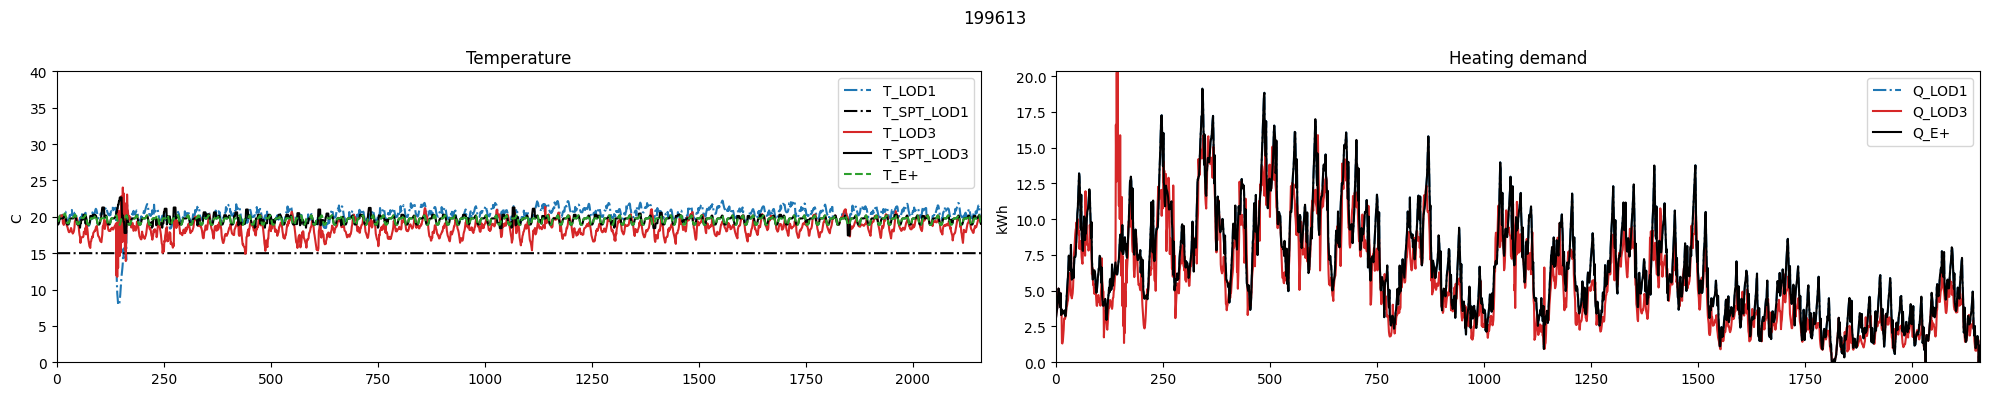

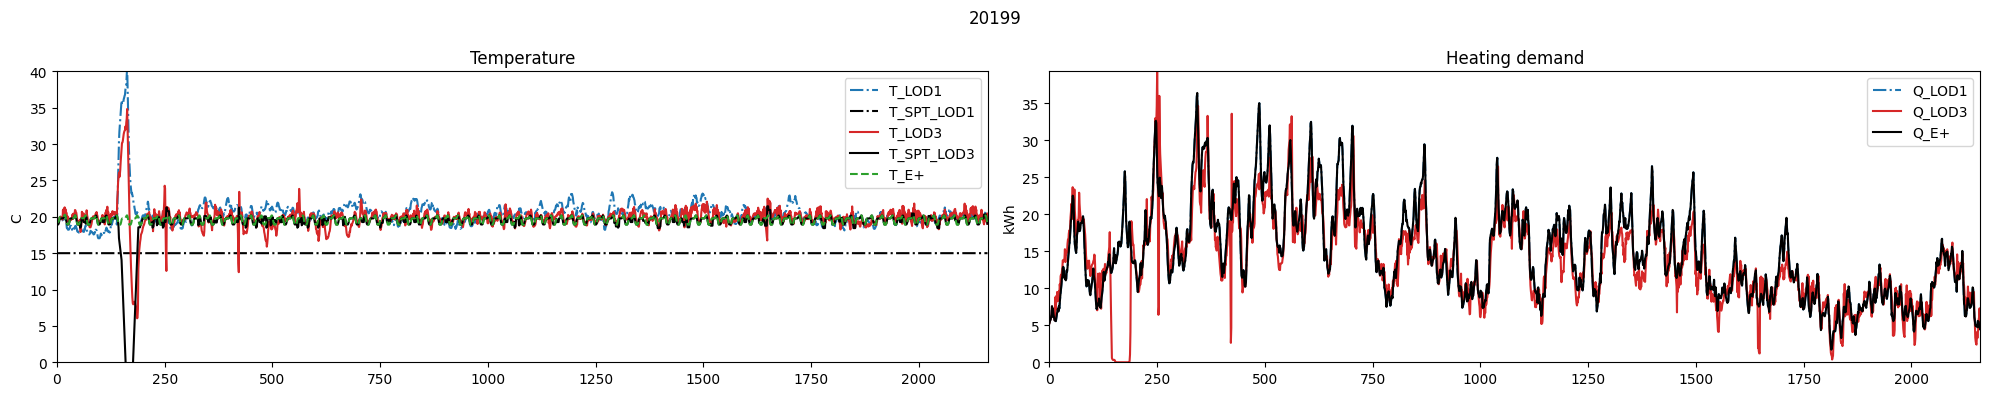

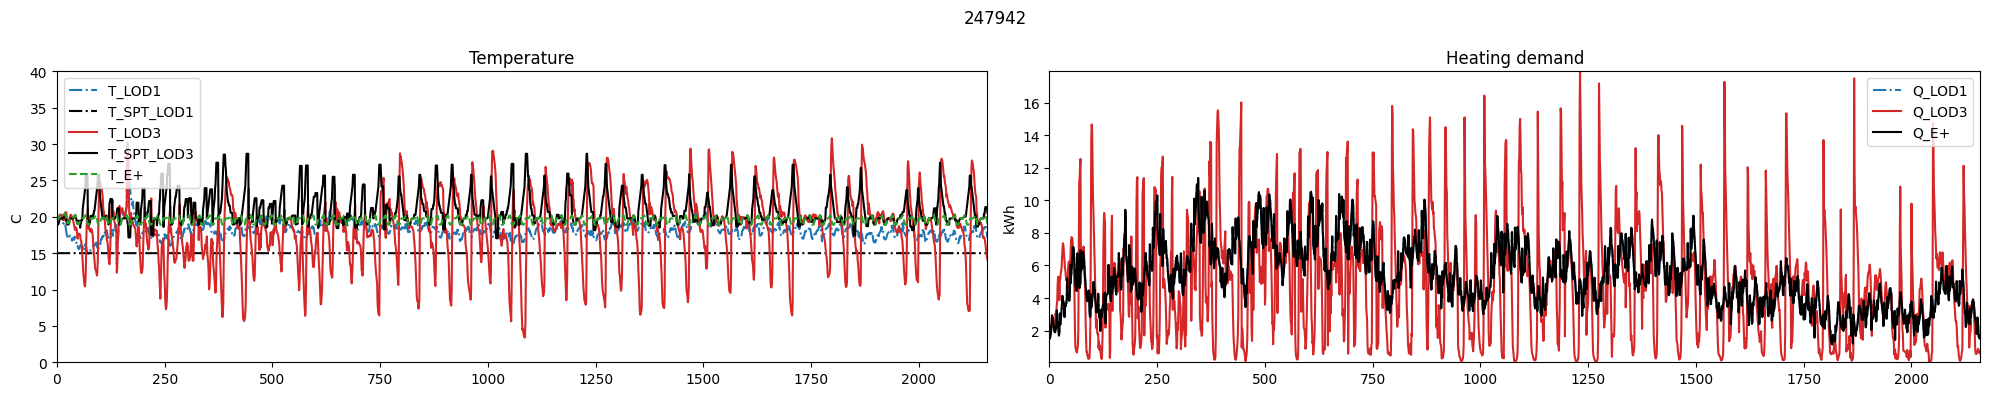

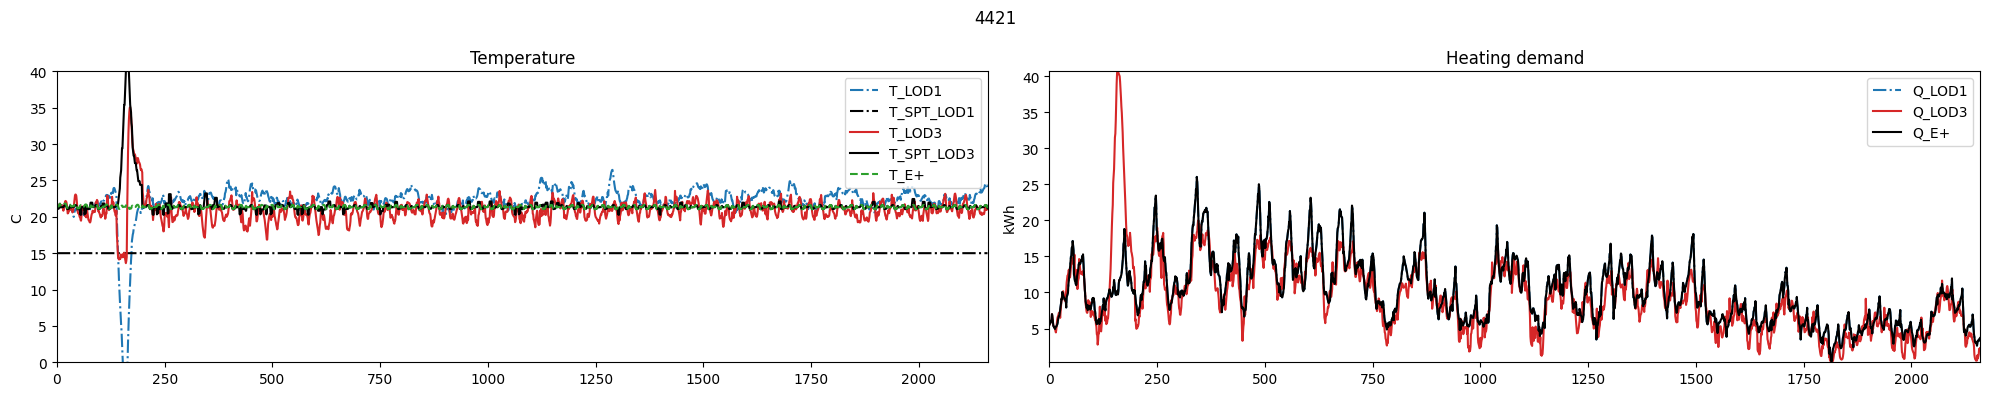

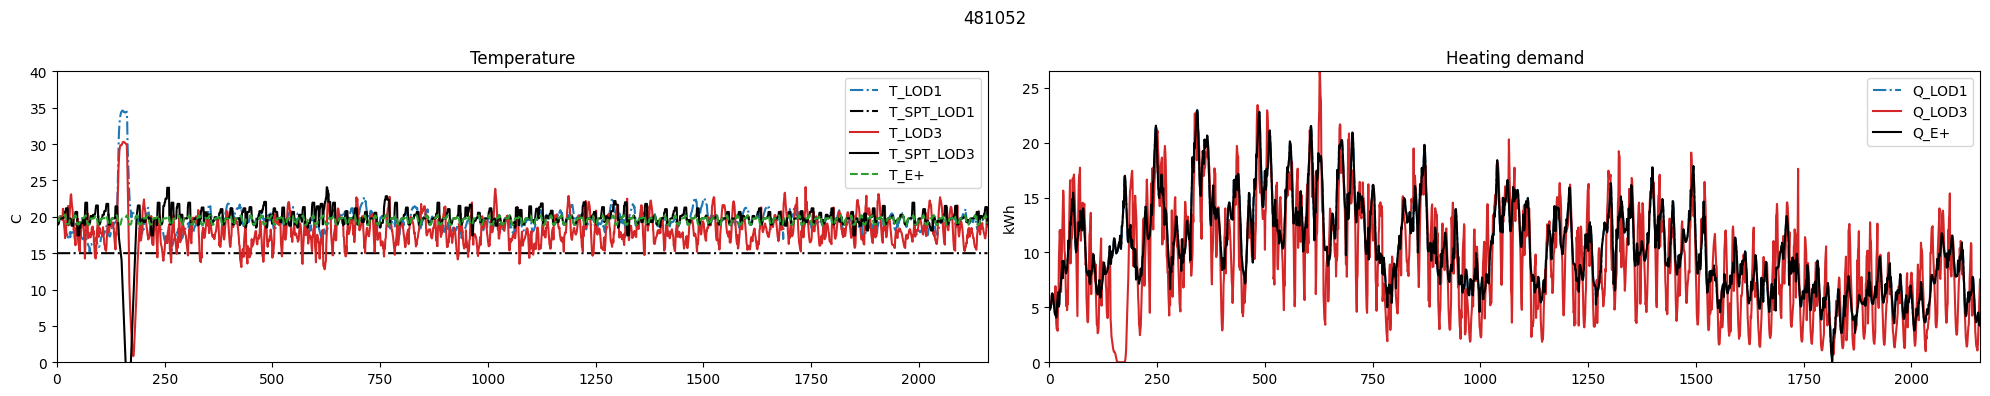

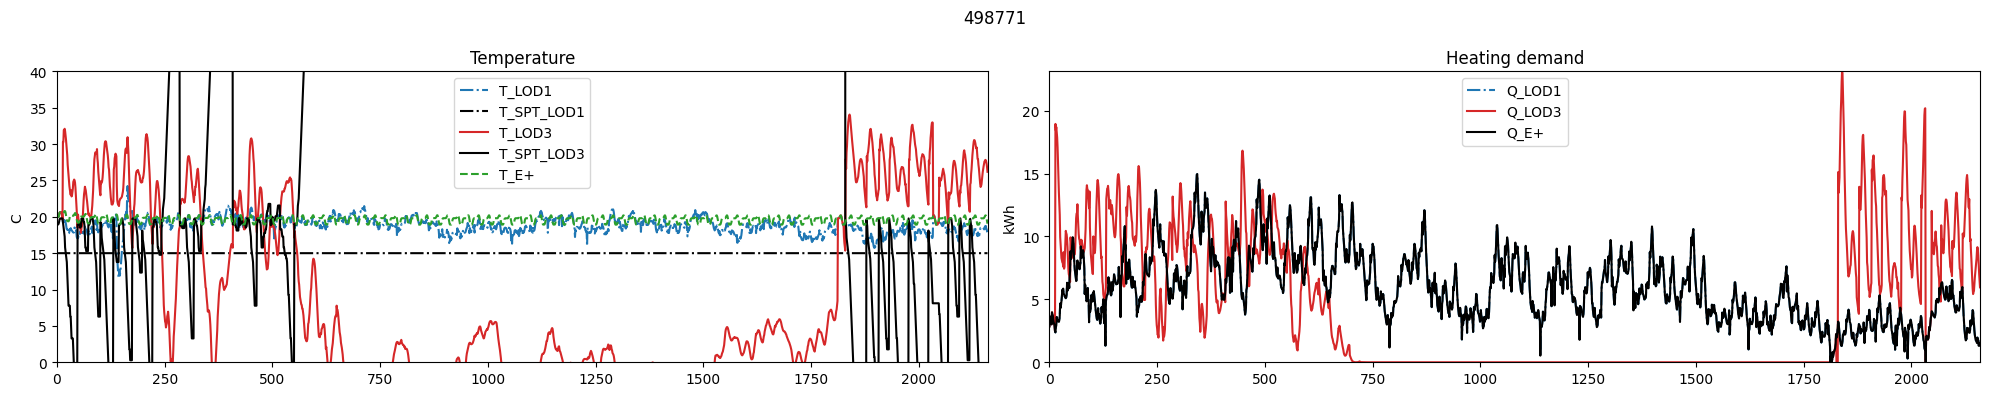

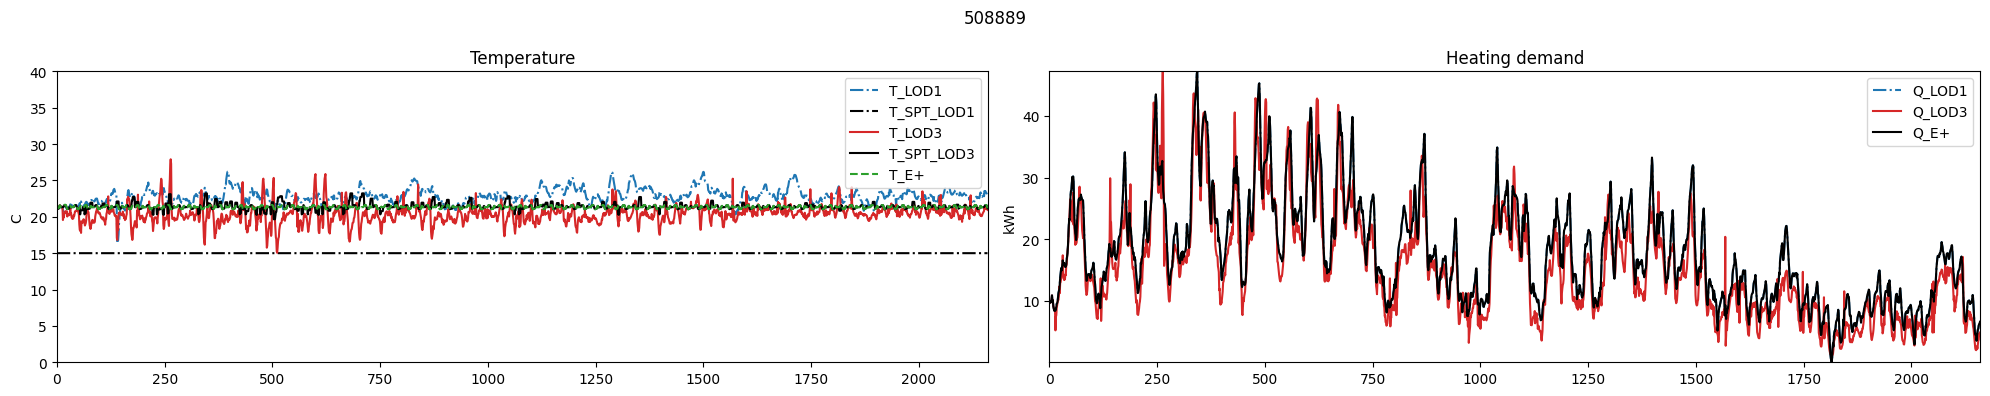

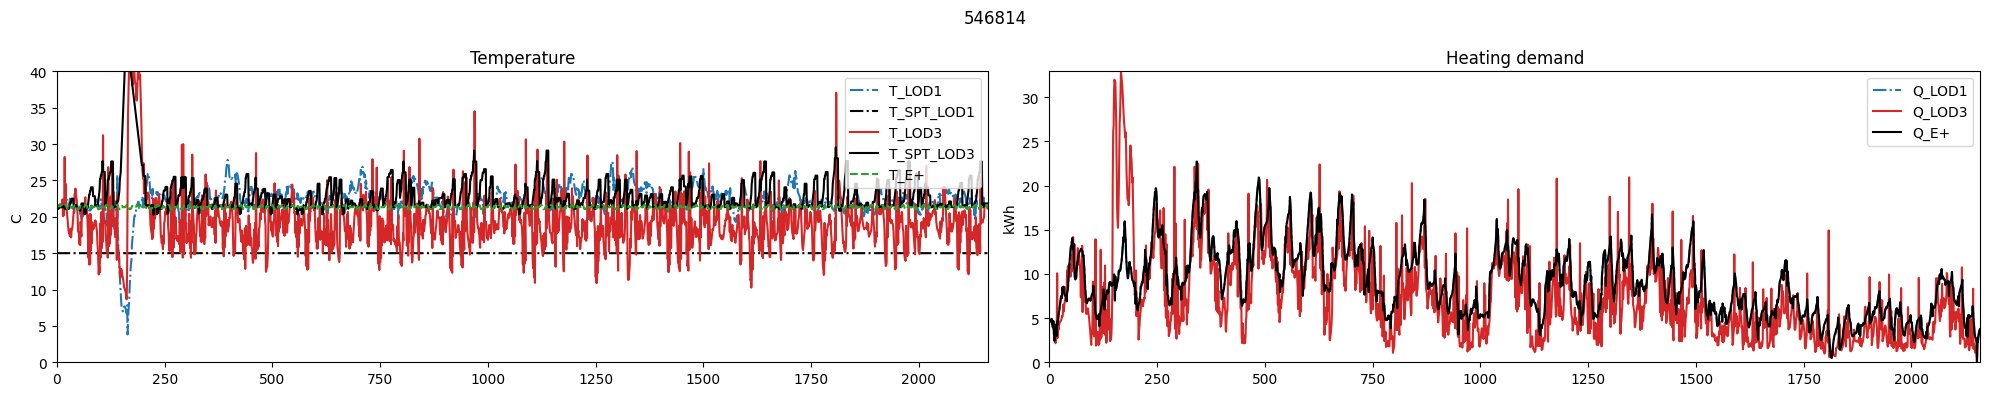

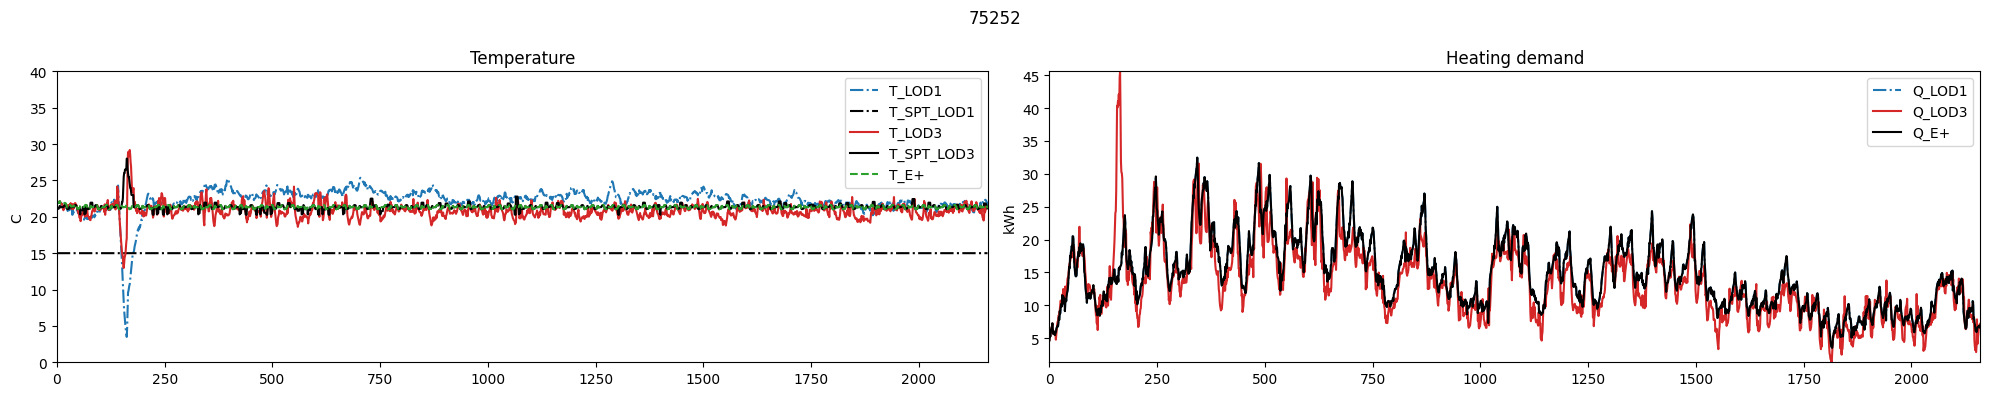

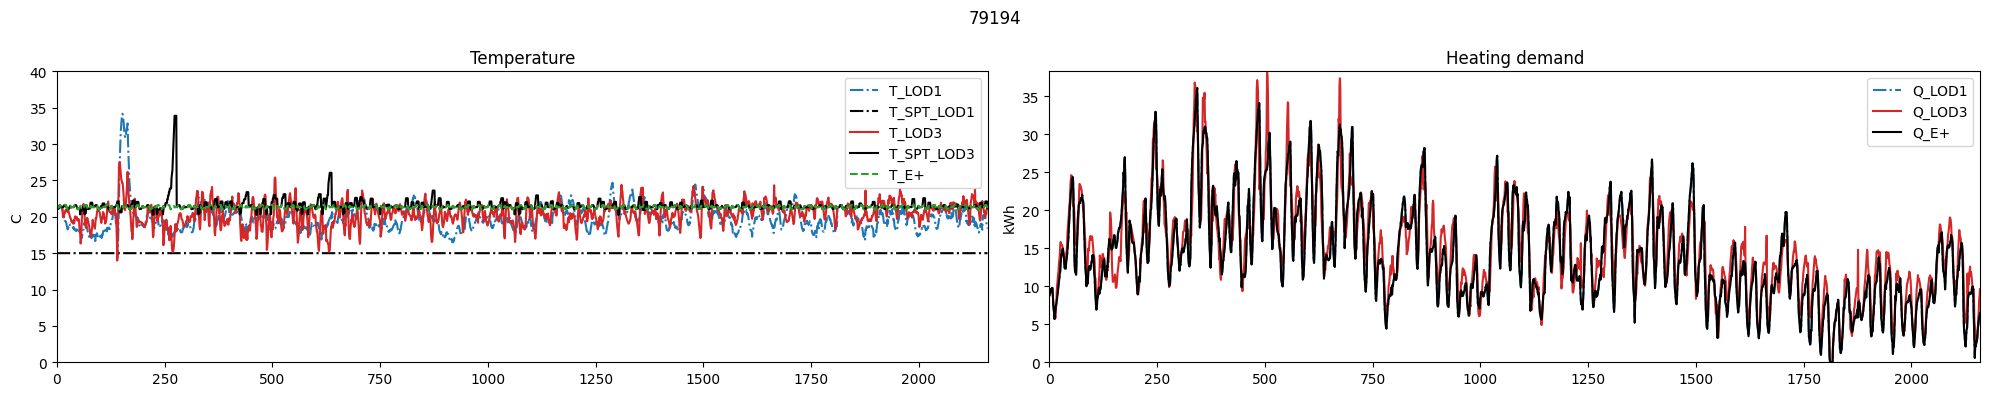

In [3]:
for b, bdata in data_reg.groupby('bldg_name'):
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))
    lod1data = bdata[bdata['lod']=='lod_1'].copy()
    lod3data = bdata[bdata['lod']=='lod_3'].copy()
    x = lod1data['time_step'].tolist()

    # temperature
    y1 = lod1data['indoor_dry_bulb_temperature'].tolist()
    y2 = lod1data['indoor_dry_bulb_temperature_set_point'].tolist()
    y3 = lod3data['indoor_dry_bulb_temperature'].tolist()
    y4 = lod3data['indoor_dry_bulb_temperature_set_point'].tolist()
    y5 = lod3data['indoor_dry_bulb_temperature_without_partial_load'].tolist()
    fig.axes[0].plot(x, y1, label='T_LOD1', color='tab:blue', linestyle='-.')
    fig.axes[0].plot(x, y2, label='T_SPT_LOD1', color='black', linestyle='-.')
    fig.axes[0].plot(x, y3, label='T_LOD3', color='tab:red', linestyle='-')
    fig.axes[0].plot(x, y4, label='T_SPT_LOD3', color='black', linestyle='-')
    fig.axes[0].plot(x, y5, label='T_E+', color='tab:green', linestyle='--')
    fig.axes[0].set_title('Temperature')
    fig.axes[0].set_ylim(0,40)
    fig.axes[0].set_ylabel('C')
    fig.axes[0].margins(0)
    fig.axes[0].legend()
    

    # demand
    y1 = lod1data['heating_demand'].tolist()
    y2 = lod3data['heating_demand'].tolist()
    y3 = lod3data['heating_demand_without_partial_load'].tolist()
    fig.axes[1].plot(x, y1, label='Q_LOD1', color='tab:blue', linestyle='-.')
    fig.axes[1].plot(x, y2, label='Q_LOD3', color='tab:red', linestyle='-')
    fig.axes[1].plot(x, y3, label='Q_E+', color='black', linestyle='-')
    fig.axes[1].set_title('Heating demand')
    fig.axes[1].set_ylabel('kWh')
    fig.axes[1].margins(0)
    fig.axes[1].legend()

    fig.suptitle(b)
    plt.tight_layout()
    plt.show()

### T_in vs T_SP for testing period, LOD 3

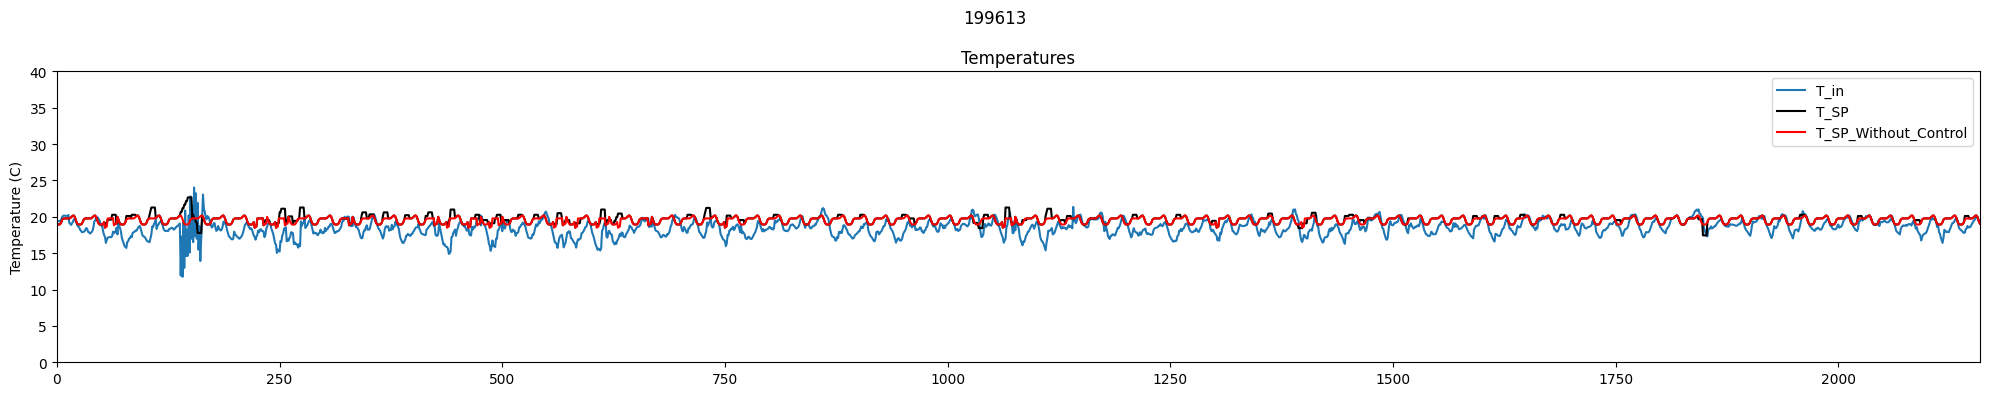

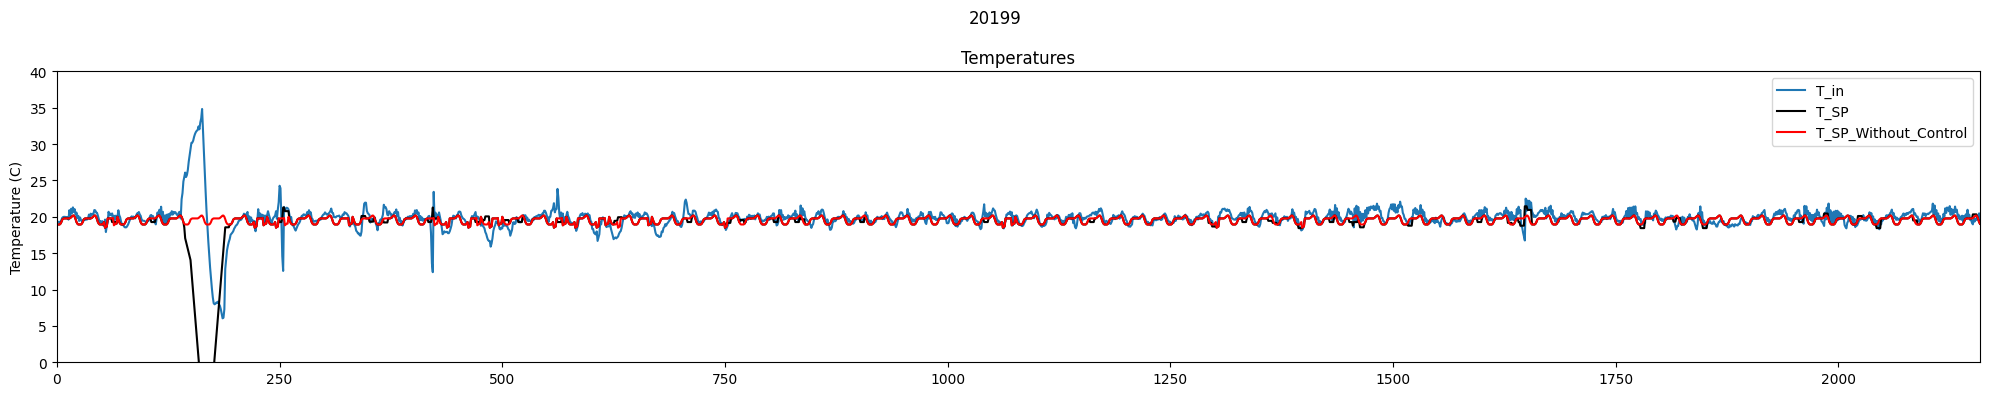

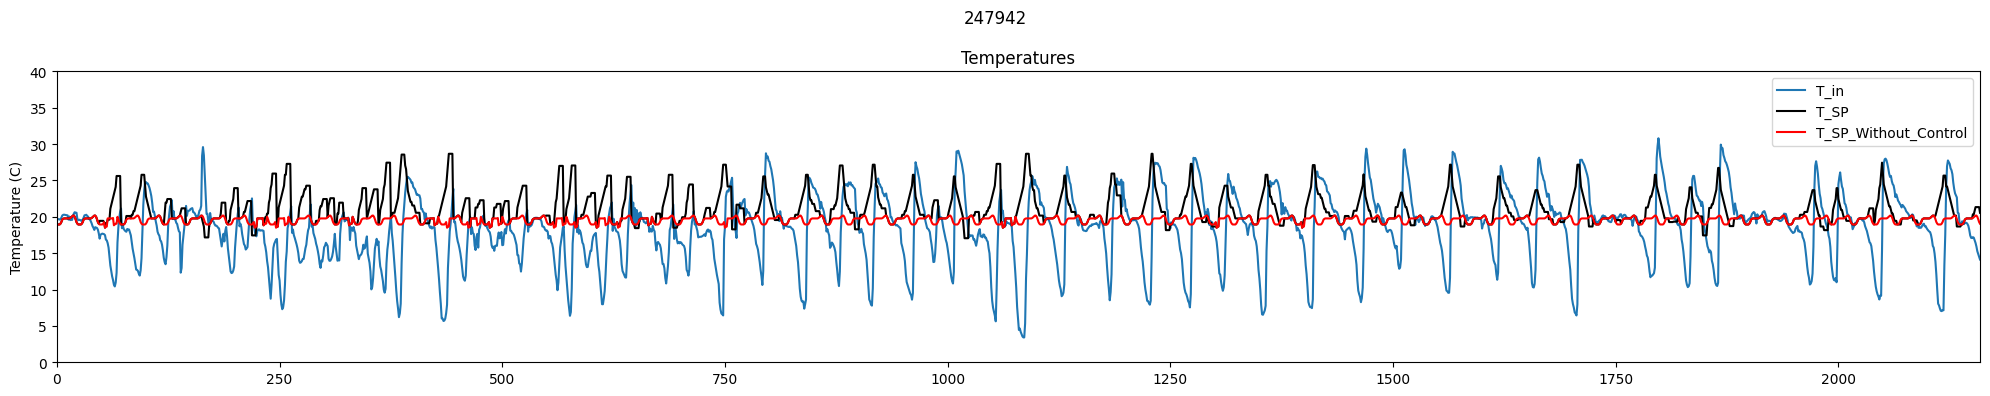

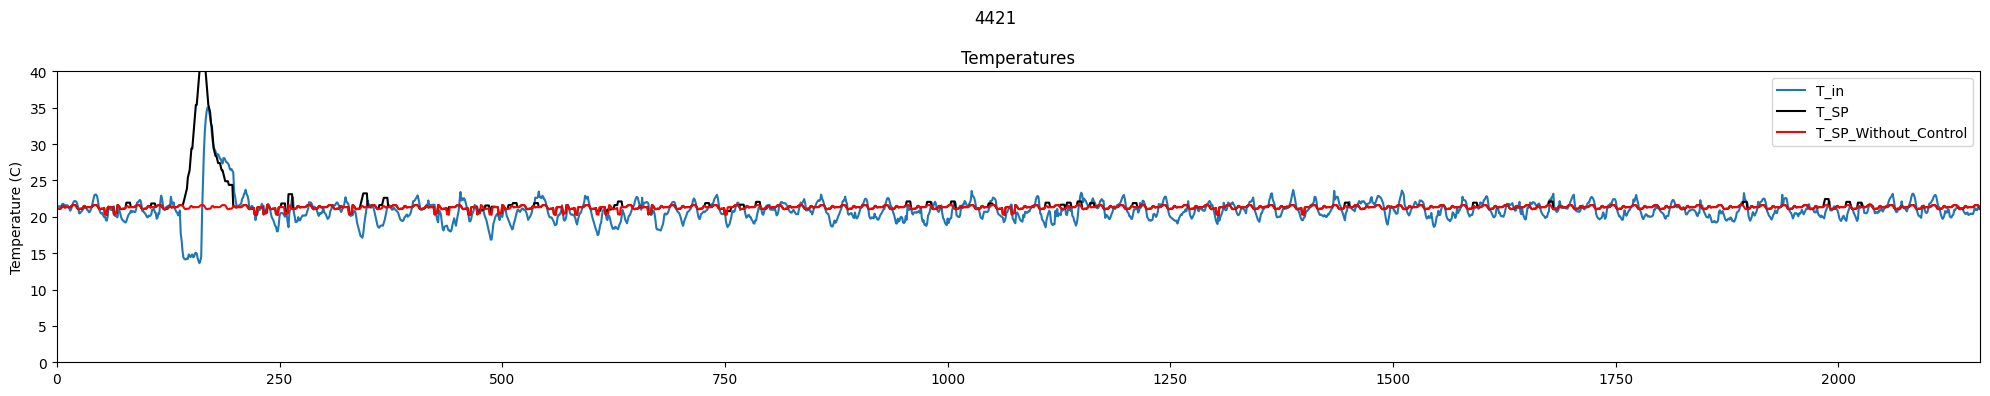

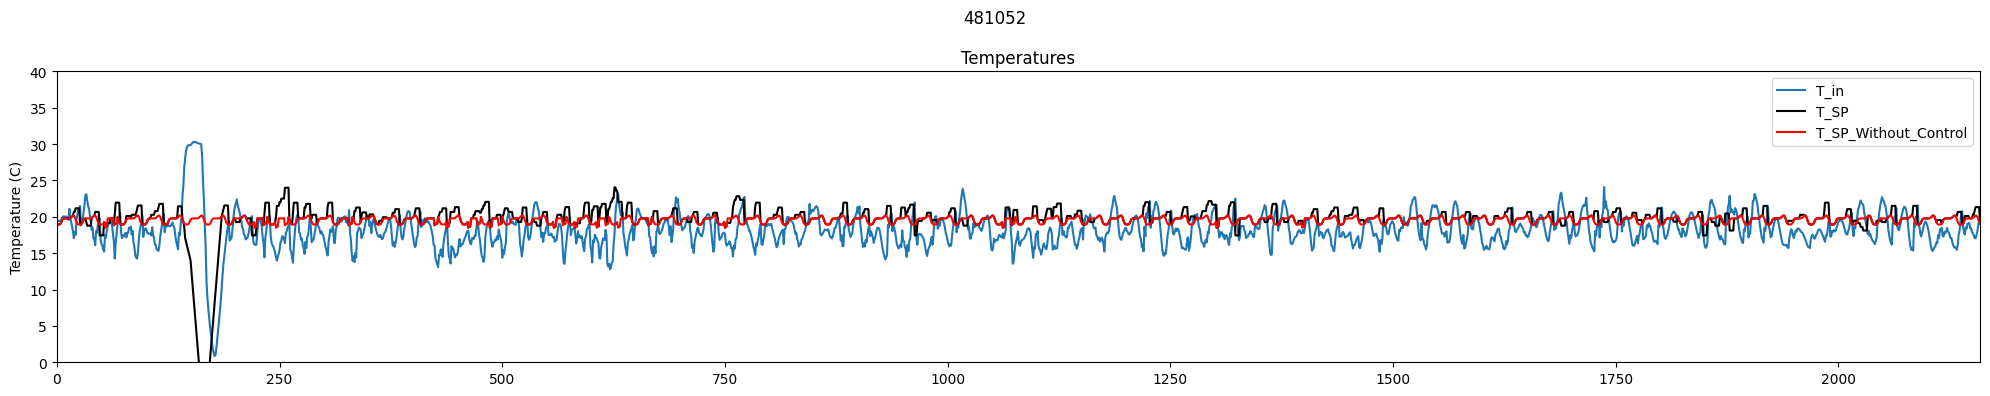

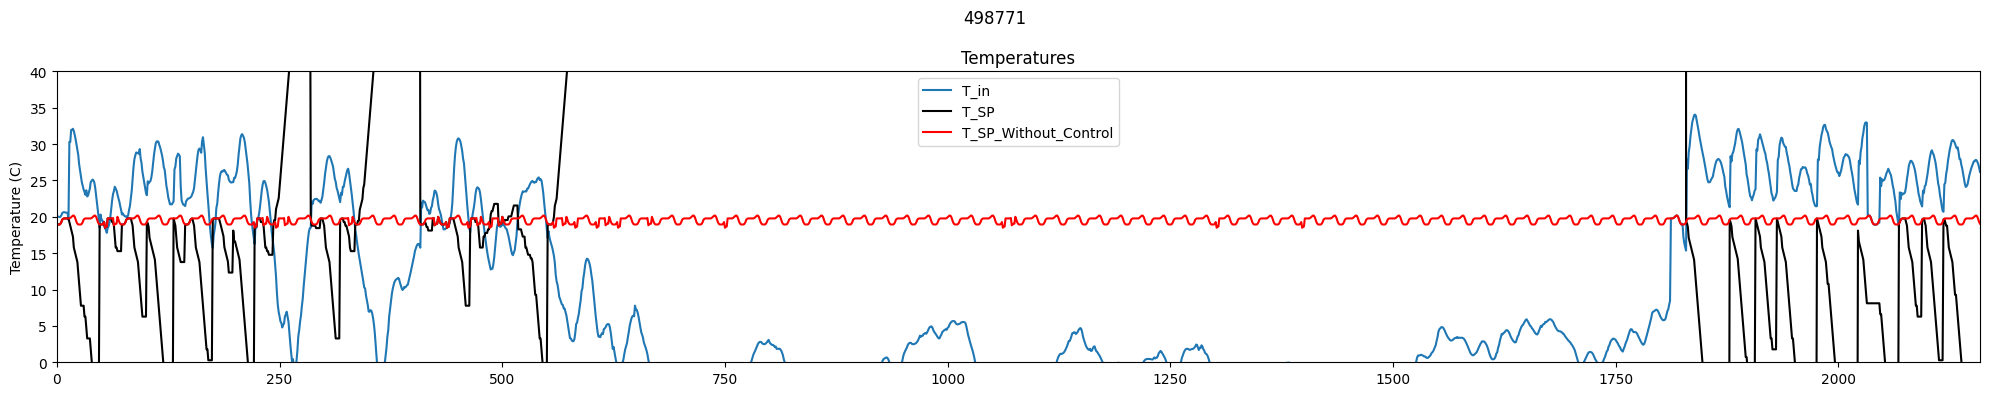

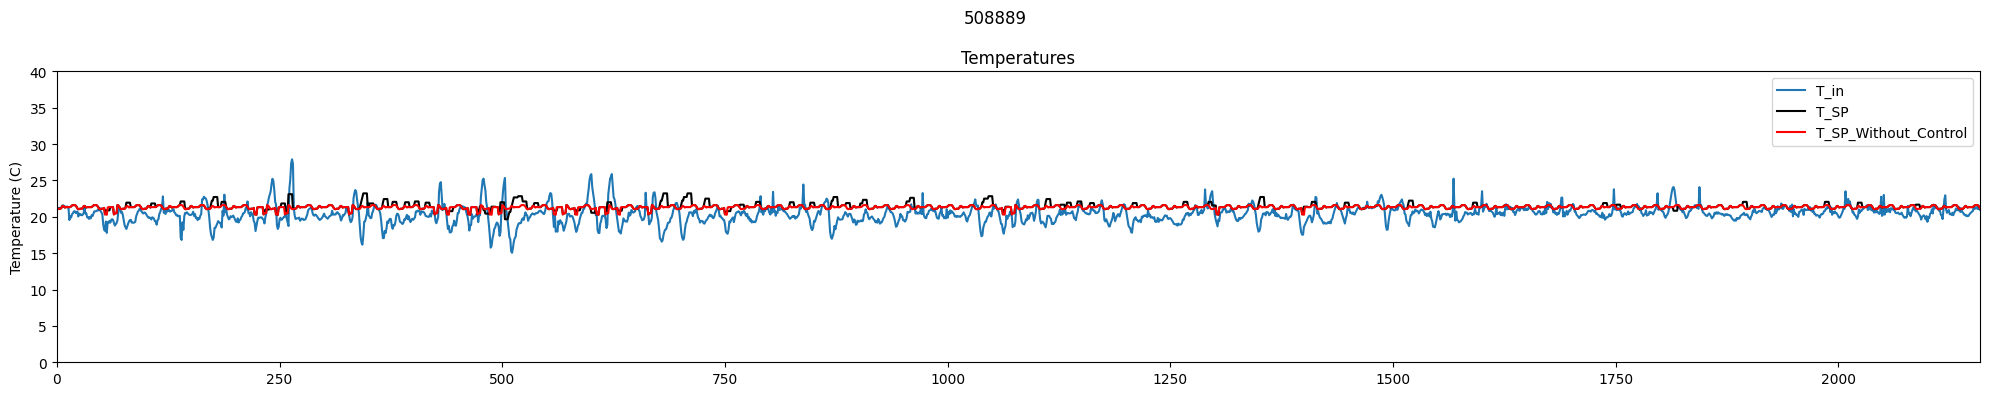

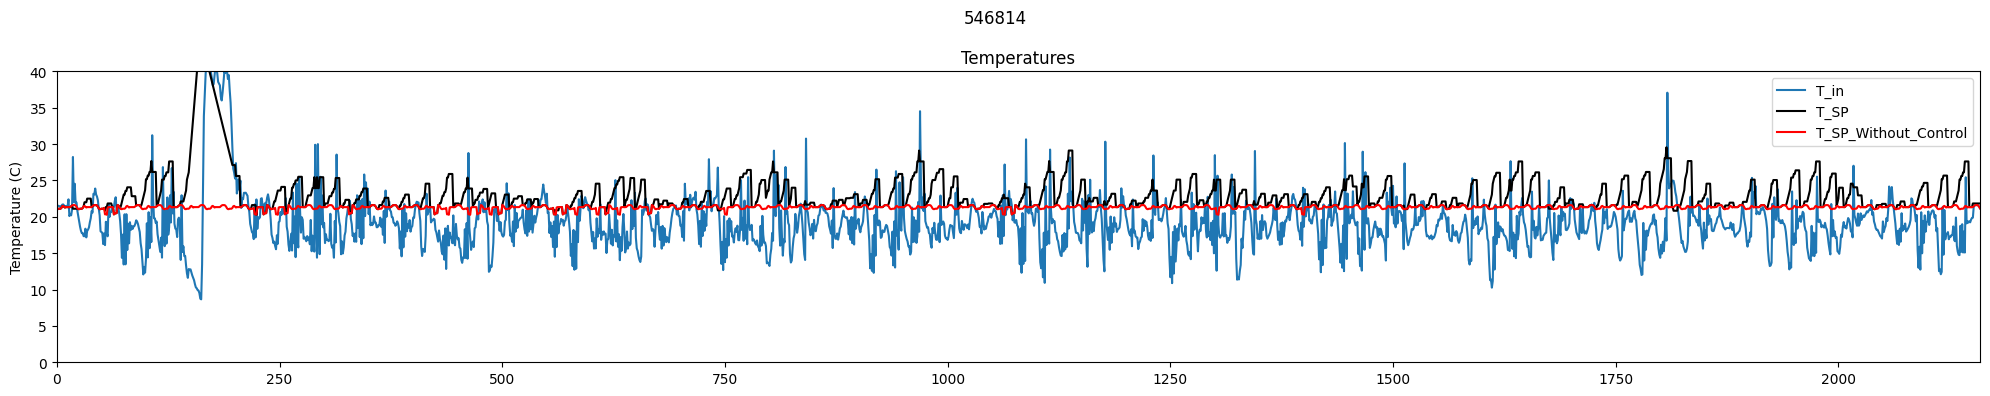

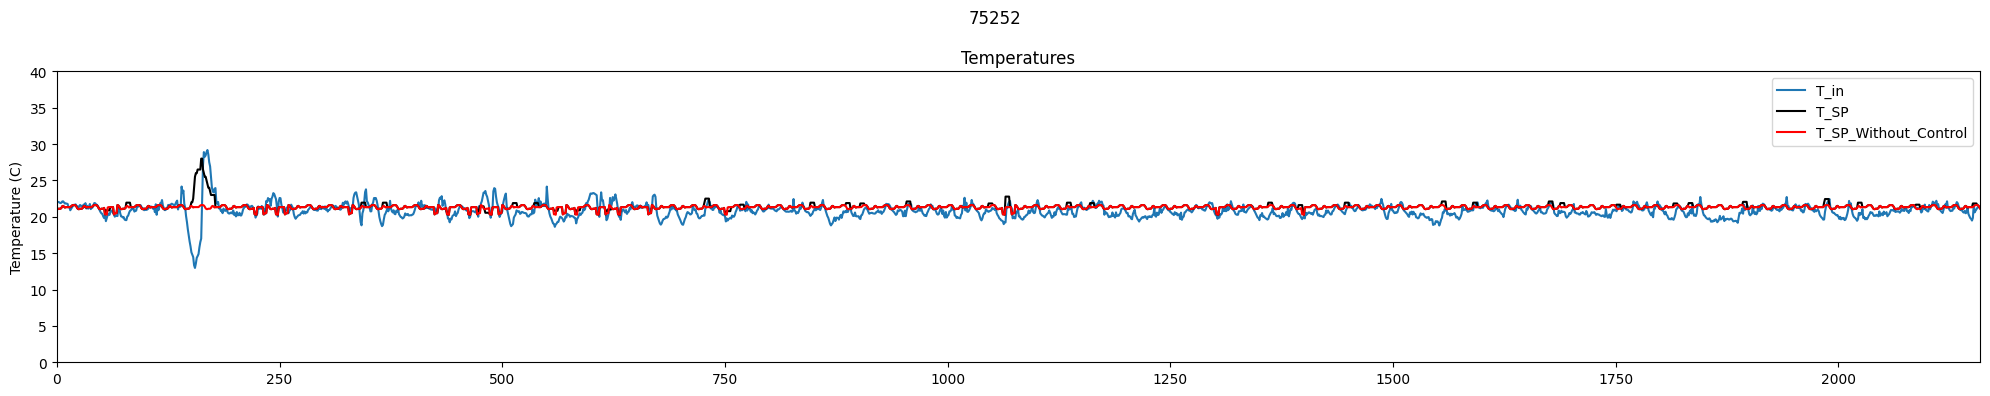

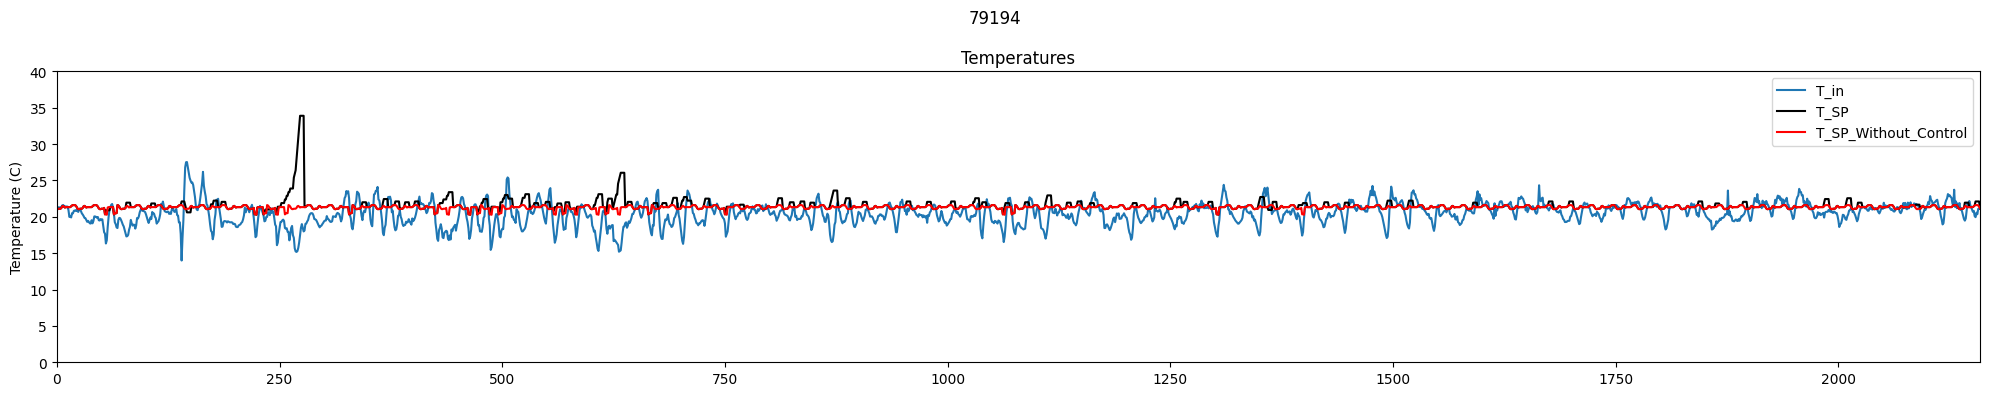

In [4]:
for b, bdata in data_reg.groupby('bldg_name'):
    fig, axs = plt.subplots(1, figsize=(20, 4))
    lod3data = bdata[bdata['lod']=='lod_3'].copy()
    x = lod3data['time_step'].tolist()

    # temperature
    y1 = lod3data['indoor_dry_bulb_temperature'].tolist()
    y2 = lod3data['indoor_dry_bulb_temperature_set_point'].tolist()
    y3 = lod3data['indoor_dry_bulb_temperature_set_point_without_control'].tolist()
    fig.axes[0].plot(x, y1, label='T_in', color='tab:blue') #linestyle='-.')
    fig.axes[0].plot(x, y2, label='T_SP', color='black') #linestyle='-.')
    fig.axes[0].plot(x, y3, label='T_SP_Without_Control', color='red') #linestyle='-.')


    fig.axes[0].set_title('Temperatures')
    fig.axes[0].set_ylim(0,40)
    fig.axes[0].set_ylabel('Temperature (C)')
    fig.axes[0].margins(0)
    fig.axes[0].legend()

    fig.suptitle(b)
    plt.tight_layout()
    plt.show()

In [5]:
print(data_reg.keys())

Index(['bldg_name', 'net_electricity_consumption',
       'net_electricity_consumption_without_storage',
       'net_electricity_consumption_without_storage_and_partial_load',
       'net_electricity_consumption_without_storage_and_partial_load_and_pv',
       'indoor_dry_bulb_temperature',
       'indoor_dry_bulb_temperature_without_partial_load',
       'indoor_dry_bulb_temperature_set_point',
       'indoor_dry_bulb_temperature_set_point_without_control',
       'occupant_count', 'heating_electricity_consumption', 'heating_demand',
       'heating_demand_without_partial_load', 'dhw_electricity_consumption',
       'dhw_demand', 'non_shiftable_load',
       'non_shiftable_load_electricity_consumption',
       'energy_to_non_shiftable_load', 'energy_from_dhw_device',
       'energy_from_heating_device', 'occupant_a_increase',
       'occupant_b_increase', 'occupant_a_decrease', 'occupant_b_decrease',
       'occupant_increase_setpoint_probability',
       'occupant_decrease_setpoint_p

### Plot the net electricity consumption for LOD 1 and LOD 3 for the testing period

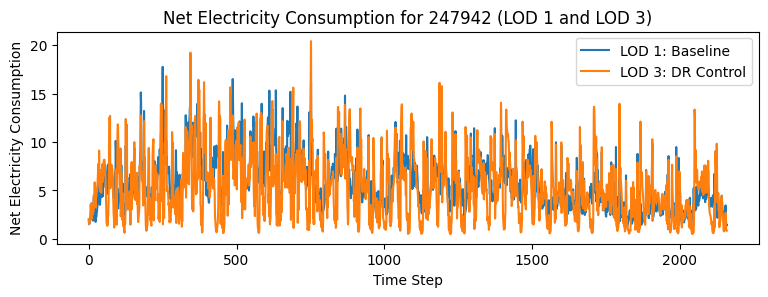

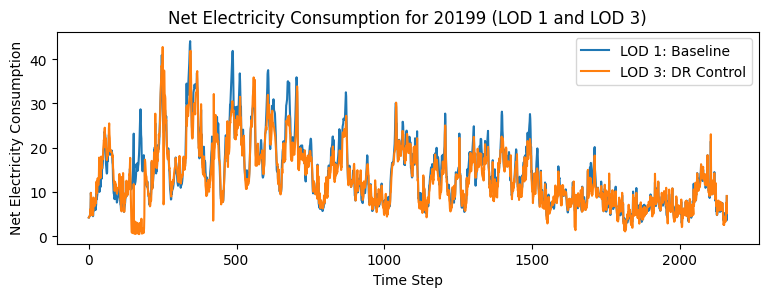

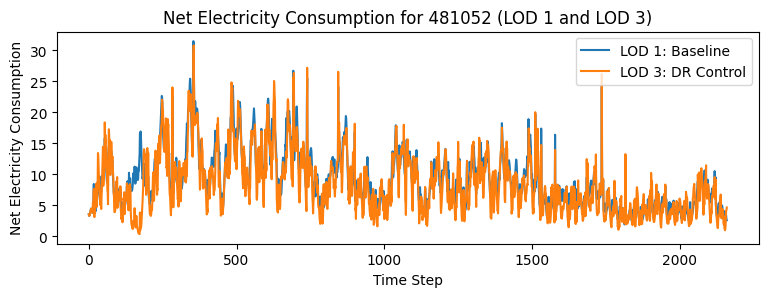

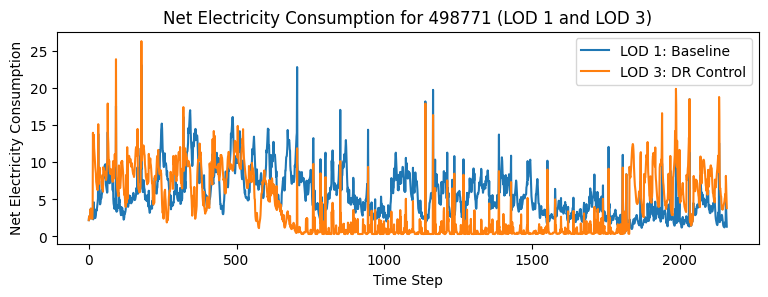

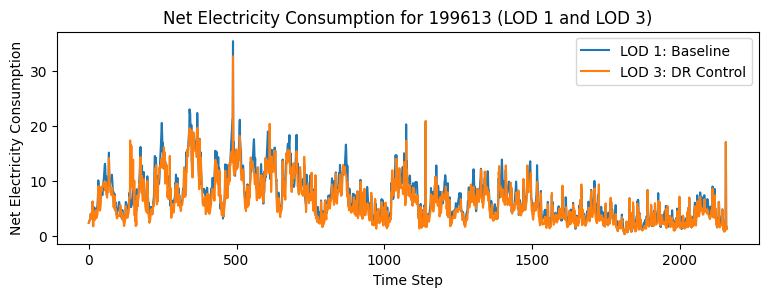

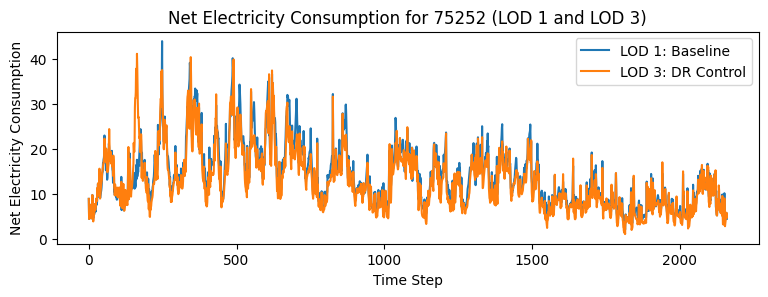

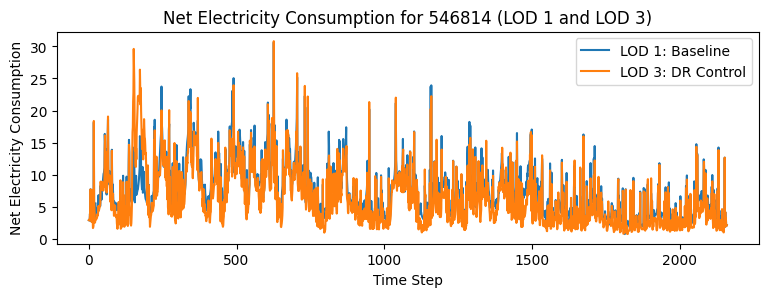

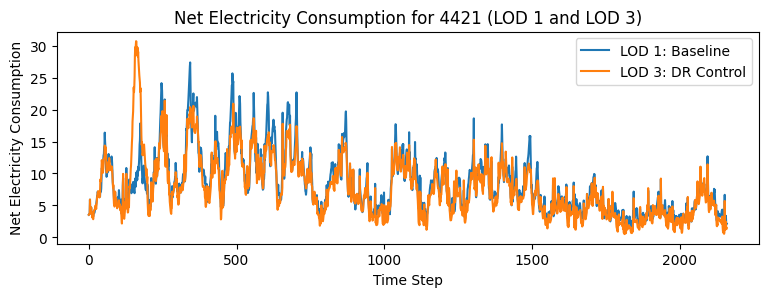

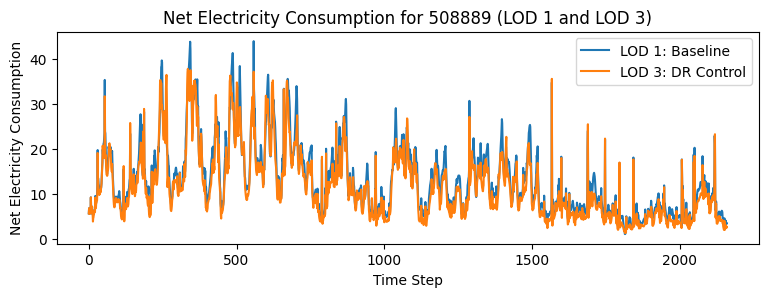

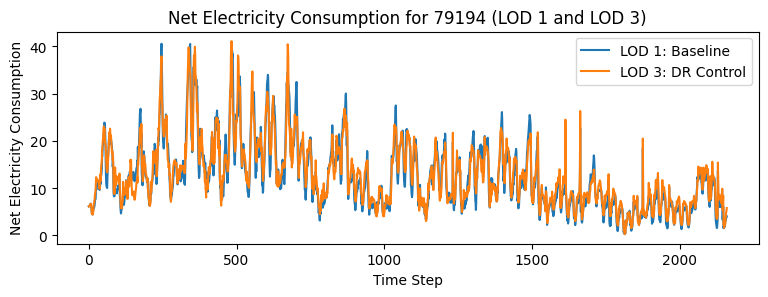

In [6]:
# Extract unique buildings
buildings = data_reg['bldg_name'].unique()

for building in buildings:
    # Create a new figure for each building with specified size
    plt.figure(figsize=(23/2.54, 7/2.54))  # Convert from cm to inches
    
    # Filter data for the current building
    building_data = data_reg[data_reg['bldg_name'] == building]
    
    # Extract data for LOD 1 and LOD 3
    lod1_data = building_data[building_data['lod'] == 'lod_1']
    lod3_data = building_data[building_data['lod'] == 'lod_3']
    
    # Plot net electricity consumption for LOD 1
    plt.plot(lod1_data['time_step'], lod1_data['net_electricity_consumption'], label='LOD 1: Baseline')
    
    # Plot net electricity consumption for LOD 3
    plt.plot(lod3_data['time_step'], lod3_data['net_electricity_consumption'], label='LOD 3: DR Control')

    plt.xlabel('Time Step')
    plt.ylabel('Net Electricity Consumption')
    plt.title(f'Net Electricity Consumption for {building} (LOD 1 and LOD 3)')
    plt.legend()
    plt.show()

### Calculate for each building: net electricity consumption during DR events, LOD1 vs LOD3

In [7]:
# Note - change file path to work for your computer 
file_path = '/root/CityLearn/simulation/data/DR_Setpoints_Electricity_Prices/DR_Events_2022.csv'

df_DR_events_2022 = pd.read_csv(file_path)

In [8]:
dr_event_electricity_summary = pd.DataFrame(columns=['bldg_name', 'DR_Event', 'lod_1_net_electricity', 'lod_3_net_electricity', 'DR_Savings'])

for building in buildings:
    # Filter data for the current building
    building_data = data_reg[data_reg['bldg_name'] == building]
    
    # Extract data for LOD 1 and LOD 3
    lod1_data = building_data[building_data['lod'] == 'lod_1']
    lod3_data = building_data[building_data['lod'] == 'lod_3']
    
    # Filter df_DR_events_2022 for the rows where 'DR_Event_Timestep' = 1
    #dr_event_timestep = df_DR_events_2022[df_DR_events_2022['DR_Event_Timestep'] == 1]['time_step'].iloc[0]
    dr_event_timesteps = df_DR_events_2022[df_DR_events_2022['DR_Event_Timestep'] == 1]

    # Filter lod1_data and lod3_data for rows where a dr event occurs (is in dr_event_timesteps)
    lod1_data_dr = lod1_data[lod1_data['time_step'].isin(dr_event_timesteps['time_step'])]
    lod3_data_dr = lod3_data[lod3_data['time_step'].isin(dr_event_timesteps['time_step'])]
    
    # Merge 'DR_Events' column from df_DR_events_2022 into lod1_data_dr and lod3_data_dr by 'time_step'
    lod1_data_dr = pd.merge(lod1_data_dr, df_DR_events_2022[['time_step', 'DR_Event']], on='time_step')
    lod3_data_dr = pd.merge(lod3_data_dr, df_DR_events_2022[['time_step', 'DR_Event']], on='time_step')

    # Sum of net electricity consumption for LOD 1 , LOD 3
    lod1_net_electricity_sum = lod1_data_dr['net_electricity_consumption'].sum()
    lod3_net_electricity_sum = lod3_data_dr['net_electricity_consumption'].sum()
    
    # DR_Savings percentage difference between LOD 1 , LOD 3
    dr_savings = ((lod1_net_electricity_sum - lod3_net_electricity_sum) / lod1_net_electricity_sum) * 100
    
    # Append the summary to dr_event_electricity_summary DataFrame
    dr_event_electricity_summary = dr_event_electricity_summary.append({
        'bldg_name': building,
        'DR_Event': lod1_data_dr['DR_Event'].iloc[0],  # Assuming the DR event is same for LOD 1 and LOD 3
        'lod_1_net_electricity': lod1_net_electricity_sum,
        'lod_3_net_electricity': lod3_net_electricity_sum,
        'DR_Savings': dr_savings
    }, ignore_index=True)

In [9]:
dr_event_electricity_summary

bldg_name DR_Event  lod_1_net_electricity  lod_3_net_electricity  DR_Savings
0    247942        1             815.577733             637.440015   21.841905
1     20199        1            2170.178566            1920.416035   11.508847
2    481052        1            1317.103580            1093.016261   17.013644
3    498771        1             845.612964             562.346630   33.498343
4    199613        1            1131.034886             895.704052   20.806682
5     75252        1            2004.953272            1688.139537   15.801552
6    546814        1            1081.453753             937.541167   13.307327
7      4421        1            1297.893720            1071.868370   17.414781
8    508889        1            2062.406452            1714.353747   16.876048
9     79194        1            1920.111784            1702.459618   11.335390

### Calculate for each building: Daily peak demand during DR events vs. Non-DR days

In [10]:
# Create an empty DataFrame to store the extracted values
day_values_df = pd.DataFrame(columns=['Day', 'DR_Day'])

# Iterate over each day
for day in range(1, len(df_DR_events_2022) // 24 + 1):
    # Calculate the start and end index for each day
    start_index = (day - 1) * 24
    end_index = day * 24
    
    # Extract the 'DR_Day' value for the day
    dr_day_value = df_DR_events_2022.iloc[start_index]['DR_Day']
    
    # Append the day and its corresponding 'DR_Day' value to the new DataFrame
    day_values_df = day_values_df.append({'Day': day, 'DR_Day': dr_day_value}, ignore_index=True)

# Print the new DataFrame
print(day_values_df)

   Day DR_Day
0    1      0
1    2      0
2    3      1
3    4      0
4    5      0
..  ..    ...
85  86      0
86  87      0
87  88      0
88  89      0
89  90      0

[90 rows x 2 columns]


In [11]:
# Create an empty DataFrame to store the results
lod1_daily = pd.DataFrame(columns=['Building_Name', 'Day', 'Maximum_Net_Electricity_Consumption'])
lod3_daily = pd.DataFrame(columns=['Building_Name', 'Day', 'Maximum_Net_Electricity_Consumption'])

for building in buildings:
    # Filter data for the current building
    building_data = data_reg[data_reg['bldg_name'] == building]
    
    # Extract data for LOD 1 and LOD 3
    lod1_data = building_data[building_data['lod'] == 'lod_1']
    lod3_data = building_data[building_data['lod'] == 'lod_3']
    
    # Iterate through filtered data to calculate daily maximums for LOD 1
    for day in range(1, int(len(lod1_data) / 24) + 1):
        start_idx = (day - 1) * 24
        end_idx = day * 24
        daily_max = lod1_data.iloc[start_idx:end_idx]['net_electricity_consumption'].max()
        lod1_daily = lod1_daily.append({'Building_Name': building, 'Day': day, 'Maximum_Net_Electricity_Consumption': daily_max}, ignore_index=True)
        
    # Iterate through filtered data to calculate daily maximums for LOD 3
    for day in range(1, int(len(lod3_data) / 24) + 1):
        start_idx = (day - 1) * 24
        end_idx = day * 24
        daily_max_3 = lod3_data.iloc[start_idx:end_idx]['net_electricity_consumption'].max()
        lod3_daily = lod3_daily.append({'Building_Name': building, 'Day': day, 'Maximum_Net_Electricity_Consumption': daily_max_3}, ignore_index=True)

In [12]:
## Merge
lod1_merge = pd.merge(lod1_daily, day_values_df, on='Day')
lod3_merge = pd.merge(lod3_daily, day_values_df, on='Day')

In [13]:
# If DR_Day is not equal to 0, it is a day where DR events happened
lod1_merge['DR_Category'] = (lod1_merge['DR_Day'] != 0).astype(int)
lod3_merge['DR_Category'] = (lod3_merge['DR_Day'] != 0).astype(int)

# Group by building name and DR_Category
lod1_grouped = lod1_merge.groupby(['Building_Name', 'DR_Category'])
lod3_grouped = lod3_merge.groupby(['Building_Name', 'DR_Category'])

# Calculate Max_Average_DR and Max_Average_Non_DR for LOD 1
lod1_summary = lod1_grouped['Maximum_Net_Electricity_Consumption'].mean().reset_index()
lod1_max_average_dr = lod1_summary[lod1_summary['DR_Category'] == 1].groupby('Building_Name')['Maximum_Net_Electricity_Consumption'].max().reset_index()
lod1_max_average_non_dr = lod1_summary[lod1_summary['DR_Category'] == 0].groupby('Building_Name')['Maximum_Net_Electricity_Consumption'].max().reset_index()
lod1_summary = pd.merge(lod1_max_average_dr, lod1_max_average_non_dr, on='Building_Name', suffixes=('_DR_lod1', '_Non_DR_lod1'))

# Calculate Max_Average_DR and Max_Average_Non_DR for LOD 3
lod3_summary = lod3_grouped['Maximum_Net_Electricity_Consumption'].mean().reset_index()
lod3_max_average_dr = lod3_summary[lod3_summary['DR_Category'] == 1].groupby('Building_Name')['Maximum_Net_Electricity_Consumption'].max().reset_index()
lod3_max_average_non_dr = lod3_summary[lod3_summary['DR_Category'] == 0].groupby('Building_Name')['Maximum_Net_Electricity_Consumption'].max().reset_index()
lod3_summary = pd.merge(lod3_max_average_dr, lod3_max_average_non_dr, on='Building_Name', suffixes=('_DR_lod3', '_Non_DR_lod3'))

avg_peak_electricity_summary = pd.merge(lod1_summary, lod3_summary, on='Building_Name')

In [14]:
# Calculate percentage difference for DR category
avg_peak_electricity_summary['Percentage_Difference_DR'] = ((avg_peak_electricity_summary['Maximum_Net_Electricity_Consumption_DR_lod1'] - avg_peak_electricity_summary['Maximum_Net_Electricity_Consumption_DR_lod3']) / avg_peak_electricity_summary['Maximum_Net_Electricity_Consumption_DR_lod3']) * 100

# Calculate percentage difference for Non-DR category
avg_peak_electricity_summary['Percentage_Difference_Non_DR'] = ((avg_peak_electricity_summary['Maximum_Net_Electricity_Consumption_Non_DR_lod1'] - avg_peak_electricity_summary['Maximum_Net_Electricity_Consumption_Non_DR_lod3']) / avg_peak_electricity_summary['Maximum_Net_Electricity_Consumption_Non_DR_lod3']) * 100

In [15]:
avg_peak_electricity_summary

Building_Name  Maximum_Net_Electricity_Consumption_DR_lod1  \
0        199613                                    16.614713   
1         20199                                    29.949001   
2        247942                                    13.025600   
3          4421                                    18.686435   
4        481052                                    17.994748   
5        498771                                    12.269410   
6        508889                                    30.691367   
7        546814                                    18.032875   
8         75252                                    29.073676   
9         79194                                    28.510970   

   Maximum_Net_Electricity_Consumption_Non_DR_lod1  \
0                                        10.183247   
1                                        18.379471   
2                                         9.174977   
3                                        11.028057   
4                                        12.540265   
5                                         9.769819   
6                                        18.692020   
7                                        12.921512   
8                                        18.551875   
9                                        17.163730   

   Maximum_Net_Electricity_Consumption_DR_lod3  \
0                                    15.316617   
1                                    27.578243   
2                                    13.446313   
3                                    15.970123   
4                                    18.260380   
5                                     9.679945   
6                                    30.389232   
7                                    17.028646   
8                                    28.482015   
9                                    28.395910   

   Maximum_Net_Electricity_Consumption_Non_DR_lod3  Percentage_Difference_DR  \
0                                         9.742767                  8.475078   
1                                        17.350926                  8.596481   
2                                        10.278819                 -3.128834   
3                                        10.524542                 17.008714   
4                                        12.937121                 -1.454690   
5                                         8.529549                 26.750834   
6                                        17.321209                  0.994218   
7                                        13.003039                  5.897289   
8                                        17.959286                  2.077317   
9                                        17.618337                  0.405198   

   Percentage_Difference_Non_DR  
0                      4.521095  
1                      5.927894  
2                    -10.738996  
3                      4.784198  
4                     -3.067576  
5                     14.540869  
6                      7.914057  
7                     -0.626985  
8                      3.299629  
9                     -2.580305

### Plot the setpoint temperatures for the two clusters including the setbacks implemented for DR (F, C)

In [16]:
file_path = '/root/CityLearn/simulation/data/DR_Setpoints_Electricity_Prices/ALL_DR_Setpoints.csv'
DR_setpoints = pd.read_csv(file_path)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


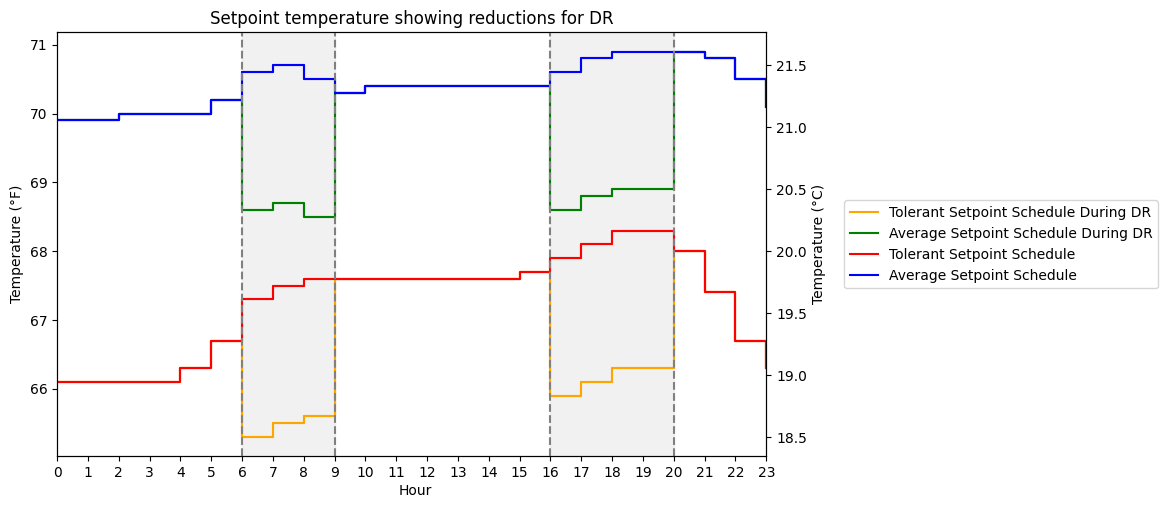

In [108]:
# Assuming df is your dataframe containing the data
# Filter data for January 9, 2022, and January 10, 2022
start_date_9 = '2022-01-09'
end_date_9 = '2022-01-10'
start_date_10 = '2022-01-10'
end_date_10 = '2022-01-11'

df_9 = DR_setpoints[(DR_setpoints['datetime'] >= start_date_9) & (DR_setpoints['datetime'] < end_date_9)]
df_10 = DR_setpoints[(DR_setpoints['datetime'] >= start_date_10) & (DR_setpoints['datetime'] < end_date_10)]

# Extract hour from datetime and create a new 'hour' column
df_9['hour'] = df_9['datetime'].dt.hour
df_10['hour'] = df_10['datetime'].dt.hour

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 5))

# Create a second y-axis for Celsius
ax2 = ax1.twinx()

# Plot Fahrenheit data
ax1.step(df_10['hour'], df_10['Setpoints_Tolerant'], label='Tolerant Setpoint Schedule During DR', color='orange', where='post')
ax1.step(df_10['hour'], df_10['Setpoints_Average'], label='Average Setpoint Schedule During DR', color='green', where='post')
ax1.step(df_9['hour'], df_9['Setpoints_Tolerant'], label='Tolerant Setpoint Schedule', color='red', where='post')
ax1.step(df_9['hour'], df_9['Setpoints_Average'], label='Average Setpoint Schedule', color='blue', where='post')
ax1.set_ylabel('Temperature (°F)', color='black')
ax1.tick_params('y', colors='black')

# Plot Celsius data
ax2.step(df_10['hour'], df_10['Setpoints_Tolerant_C'], label='Setpoints_Tolerant (C)', color='orange', where='post')
ax2.step(df_10['hour'], df_10['Setpoints_Average_C'], label='Setpoints_Average (C)', color='green', where='post')
ax2.step(df_9['hour'], df_9['Setpoints_Tolerant_C'], label='Setpoints_Tolerant (C)', color='red', where='post')
ax2.step(df_9['hour'], df_9['Setpoints_Average_C'], label='Setpoints_Average (C)', color='blue', where='post')
ax2.set_ylabel('Temperature (°C)', color='black')
ax2.tick_params('y', colors='black')

# Set x-axis labels
plt.xlabel('Hour of the day')
plt.xticks(range(24))  # Assuming data spans across 24 hours
plt.xlim(0, 23)  # Set the x-axis limit from 0 to 23 (24 hours)

# Set title
plt.title('Setpoint temperature showing reductions for DR')

# Add vertical dashed lines at specific hours
hours = [6, 9, 16, 20]
for hour in hours:
    plt.axvline(x=hour, color='gray', linestyle='--')

# Add light shading between hours 6-8 and hours 16-20
plt.axvspan(6, 9, color='lightgray', alpha=0.3)
plt.axvspan(16, 20, color='lightgray', alpha=0.3)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1
labels = labels1

plt.legend(lines, labels, loc='center left', bbox_to_anchor=(1.10, 0.5))
#plt.legend(lines, labels, loc='upper right')
plt.tight_layout()
fig.text(0.35, 0, 'Hour', ha='center')
plt.show()

In [25]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 4512 to 4559
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              48 non-null     object 
 1   Setpoints_Tolerant    48 non-null     float64
 2   Setpoints_Average     48 non-null     float64
 3   Setpoints_Tolerant_C  48 non-null     float64
 4   Setpoints_Average_C   48 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


### Plot the following KPIs on a horizontal bar graph with LOD 1 as the baseline

In [126]:
##KPIs: net electricity consumption, average daily peak demand, ramping, load factor, cost; comparing LOD 1, LOD 2, LOD 3
### Note: may not include all KPIs in final paper, for example ramping, 1 - LF may not be relevant/necessary since we didn't
### really do anything to specifically target these KPIs

### Plot the number of SP interactions over time (similar to ASHRAE plot maybe?)

In [72]:
### Similar to ASHRAE plot maybe? SHowing the quantity of the setpoint change as well perhaps

### Calculate for each building: number of overrides during DR events, total # of overrides

In [127]:
### see this file for details on when the DR events occur:
### file_path = '/root/CityLearn/simulation/data/DR_Setpoints_Electricity_Prices/DR_Events_2022.csv'
### Columns: 'DR_Event_Timestep' == 1 if timestep is a DR_Event, else 0
    ####     'DR_Event_Start' == 1 is first timestep of a DR event, else 0
    ####     'DR_Event' == counting integer for each unique DR event, e.g. event 2 is 2 (25 total), else 0
    ####     'DR_Day' == not zero if that day has a DR_event, else 0

### Calculate for each building: number of discomfort hours (>2C between T_in and T_SP) 

In [74]:
### (perhaps compare to lOD 2?)